In [1]:
import os
import anndata as ad
import pandas as pd
import numpy as np
import ktplotspy as kpy

In [2]:
# sep = '>@<' 
os.chdir('/Users/kt16/Documents/Github/ktplotspy')

# read in the files
# 1) .h5ad file used for performing cellphonedb
adata = ad.read_h5ad('data/kidneyimmune.h5ad')

# 2) output from cellphonedb
means = pd.read_csv('data/out/means.txt', sep = '\t')
pvals = pd.read_csv('data/out/pvalues.txt', sep = '\t')
decon = pd.read_csv('data/out/deconvoluted.txt', sep = '\t')

(<pycircos.pycircos.Gcircle at 0x12994ed00>,
        ligand  receptor receptor_a receptor_b                pair  \
 0   TNFRSF13B  TNFSF13B       True      False  TNFRSF13B_TNFSF13B   
 1        CD22     PTPRC       True      False          PTPRC_CD22   
 2   TNFRSF13B  TNFSF13B       True      False  TNFRSF13B_TNFSF13B   
 3        CD22     PTPRC       True      False          PTPRC_CD22   
 4   TNFRSF13B  TNFSF13B       True      False  TNFRSF13B_TNFSF13B   
 5        CD22     PTPRC       True      False          PTPRC_CD22   
 6   TNFRSF13B  TNFSF13B       True      False  TNFRSF13B_TNFSF13B   
 7        CD22     PTPRC       True      False          PTPRC_CD22   
 8   TNFRSF13B  TNFSF13B       True      False  TNFRSF13B_TNFSF13B   
 9        CD22     PTPRC       True      False          PTPRC_CD22   
 10  TNFRSF13B  TNFSF13B       True      False  TNFRSF13B_TNFSF13B   
 11       CD22     PTPRC       True      False          PTPRC_CD22   
 12  TNFRSF13B  TNFSF13B       True      Fals

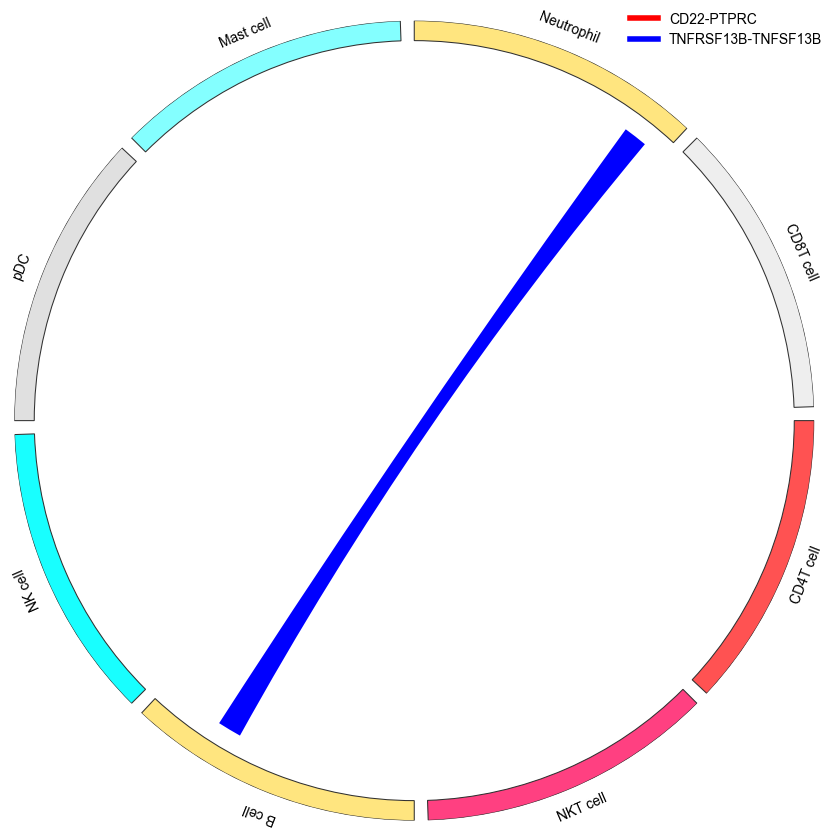

In [7]:
# begin
kpy.plot_cpdb_chord(
        adata=adata,
        cell_type1="B cell",
        cell_type2=".", # this means all cell-types
        means=means,
        pvals=pvals,
        deconvoluted=decon,
        celltype_key="celltype",
        genes=["PTPRC", "TNFSF13", 'BMPR2'],
        keep_significant_only = True,
        col_dict = {'CD22-PTPRC':'red', 'TNFRSF13B-TNFSF13B':'blue'}
    )

In [11]:
lr_interactions = kpy.plot_cpdb(
        adata=adata,
        cell_type1="B cell",
        cell_type2=".", # this means all cell-types
        means=means,
        pvals=pvals,
        celltype_key="celltype",
        genes=["PTPRC", "TNFSF13", 'BMPR2'],
        keep_significant_only = True,
        return_table = True
    )

In [13]:
DEFAULT_SEP = '>@<'

In [14]:
barcodes = lr_interactions["barcode"] = [
        a + DEFAULT_SEP + b for a, b in zip(lr_interactions.celltype_group, lr_interactions.interaction_group)
    ]

In [16]:
lr_interactions["barcode"].duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: barcode, dtype: bool

In [4]:
# kpy.plot_cpdb_chord(
#         adata=adata,
#         cell_type1="B cell",
#         cell_type2=".", # this means all cell-types
#         means=means,
#         pvals=pvals,
#         deconvoluted=decon,
#         celltype_key="celltype",
#         genes=["PTPRC", "TNFSF13", 'BMPR2'],
#     )

In [5]:
kpy.plot_cpdb(
        adata=adata,
        cell_type1="B cell",
        cell_type2=".", # this means all cell-types
        means=means,
        pvals=pvals,
        celltype_key="celltype",
        genes=["PTPRC", "TNFSF13", 'BMPR2'],
        return_table = True
    )

,interaction_group,celltype_group,scaled_means,pvals,x_means,y_means,x_stroke,neglog10p,significant
0,TNFRSF13B-TNFSF13B,B cell-B cell,0.148897,1.000,0.148897,NaN,0.0,0.000000,NaN
1,PTPRC-CD22,B cell-B cell,0.208246,0.968,0.208246,NaN,0.0,0.000000,NaN
2,TNFRSF13B-TNFSF13B,B cell-CD4T cell,0.414522,1.000,0.414522,NaN,0.0,0.000000,NaN
3,PTPRC-CD22,B cell-CD4T cell,0.149084,1.000,0.149084,NaN,0.0,0.000000,NaN
4,TNFRSF13B-TNFSF13B,B cell-CD8T cell,0.231618,1.000,0.231618,NaN,0.0,0.000000,NaN
5,PTPRC-CD22,B cell-CD8T cell,NaN,1.000,NaN,NaN,NaN,0.000000,NaN
6,TNFRSF13B-TNFSF13B,B cell-Mast cell,NaN,1.000,NaN,NaN,NaN,0.000000,NaN
7,PTPRC-CD22,B cell-Mast cell,NaN,1.000,NaN,NaN,NaN,0.000000,NaN
8,TNFRSF13B-TNFSF13B,B cell-NK cell,0.180147,1.000,0.180147,NaN,0.0,0.000000,NaN
9,PTPRC-CD22,B cell-NK cell,0.148953,1.000,0.148953,NaN,0.0,0.000000,NaN


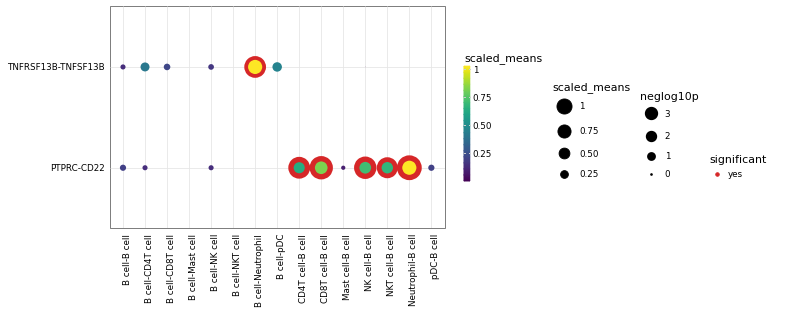

<ggplot: (311834013)>

In [6]:
kpy.plot_cpdb(
        adata=adata,
        cell_type1="B cell",
        cell_type2=".", # this means all cell-types
        means=means,
        pvals=pvals,
        celltype_key="celltype",
        genes=["PTPRC", "TNFSF13", 'BMPR2'],
#         return_table = True
    )